## BIG Mart Mini Project - Sales Evaluation

# Problem Statement

#The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

# Hypothesis Generation

#There are four (04) hypothesis that we would want to test after the EDA:

On basis of item:

1- Item visibility in store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.

2-Product Frequency: More frequent products will have high Sales.

On basis of store:

1-City type: Stores located in urban cities should have higher sales because of the higher income levels of people there.

2- Store capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place.

# Importing Libraries

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read the dataset 

In [29]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [31]:
df = pd.concat([test, train])

In [34]:
df.shape

(14204, 12)

In [38]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,NaN
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN


In [39]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [43]:
df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,14204,11765.000000,14204,14204.000000,14204,14204.000000,14204,14204.000000,10188,14204,14204,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDY28,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,8485,NaN,2013,NaN,1559,NaN,4655,5583,9294,NaN
mean,NaN,12.792854,NaN,0.065953,NaN,141.004977,NaN,1997.830681,NaN,NaN,NaN,2181.288914
std,NaN,4.652502,NaN,0.051459,NaN,62.086938,NaN,8.371664,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.710000,NaN,0.027036,NaN,94.012000,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.054021,NaN,142.247000,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.750000,NaN,0.094037,NaN,185.855600,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [139]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [42]:
df.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

# Exploratory Data Analysis

In [50]:
df1 = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
df1

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [48]:
# Numeric variables

In [49]:
# Let's plot histogram first:

In [51]:
# Let's start by plotting histogram for Item's weight using below commands:

<AxesSubplot:>

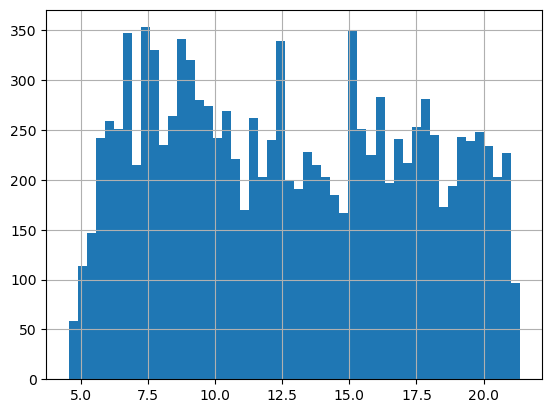

In [52]:
df['Item_Weight'].hist(bins=50)

# Here we observe that there are few extreme values. This is also the reason why 50 bins are required to depict the distribution clearly.



# Next, we look at box plots to understand the distributions. Box plot for fare can be plotted by:

<AxesSubplot:>

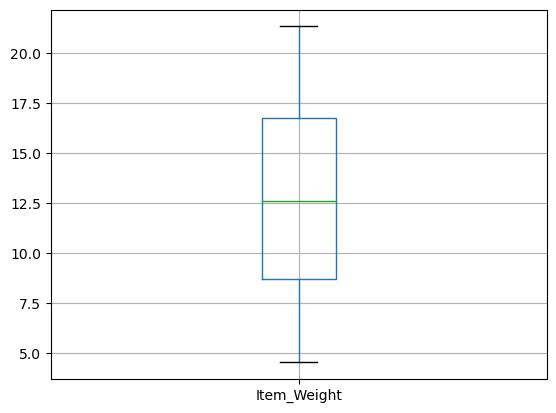

In [55]:
df.boxplot(column='Item_Weight')

# This confirms the presence of a lot of outliers/extreme values. 

In [57]:
 # Now, Let’s look at the histogram and boxplot of  'Item_Visibility

<AxesSubplot:>

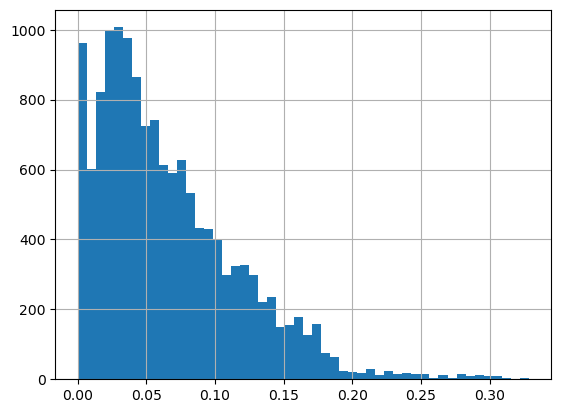

In [58]:
df['Item_Visibility'].hist(bins=50)

<AxesSubplot:>

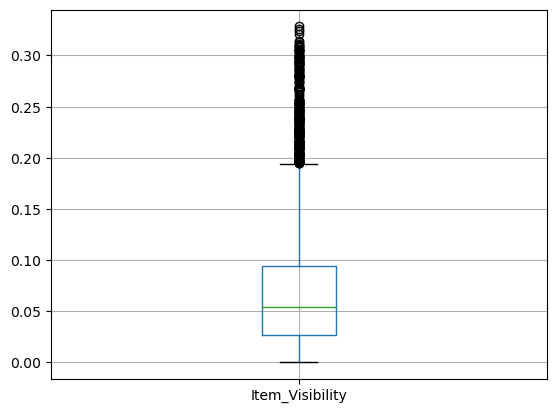

In [59]:
df.boxplot(column='Item_Visibility')

In [60]:
 # Now, Let’s look at the histogram and boxplot of  'Item_MRP'

<AxesSubplot:>

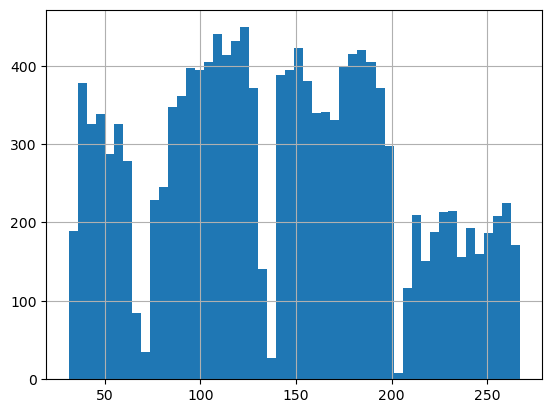

In [61]:
df['Item_MRP'].hist(bins=50)

<AxesSubplot:>

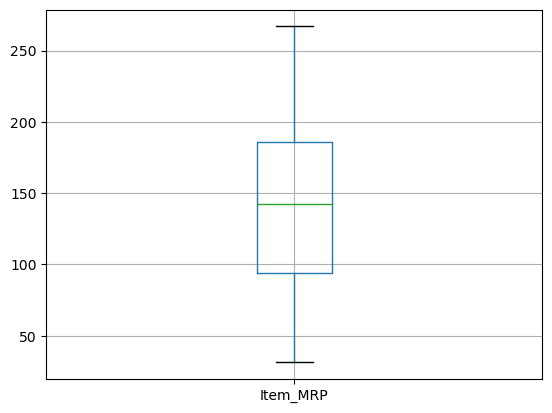

In [62]:
df.boxplot(column= 'Item_MRP')

In [63]:
 # Now, Let’s look at the histogram and boxplot of  'Outlet_Establishment_Year'

<AxesSubplot:>

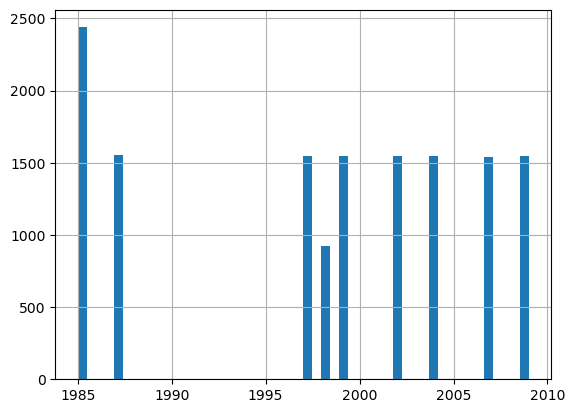

In [64]:
df['Outlet_Establishment_Year'].hist(bins=50)

<AxesSubplot:>

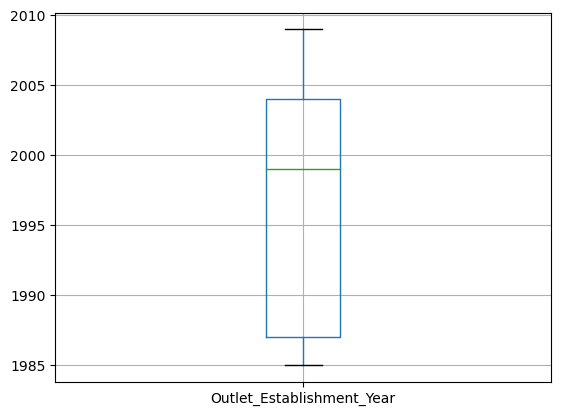

In [66]:
df.boxplot(column= 'Outlet_Establishment_Year')

<AxesSubplot:>

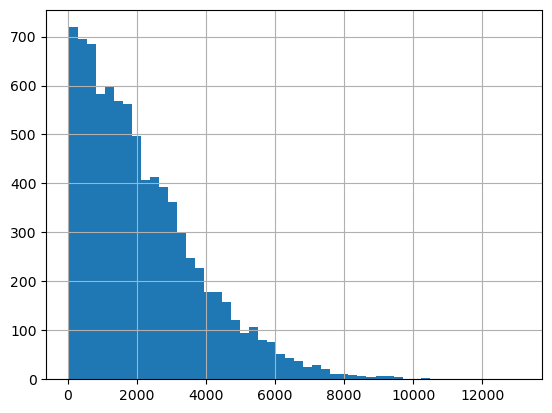

In [67]:
df['Item_Outlet_Sales'].hist(bins=50)

<AxesSubplot:>

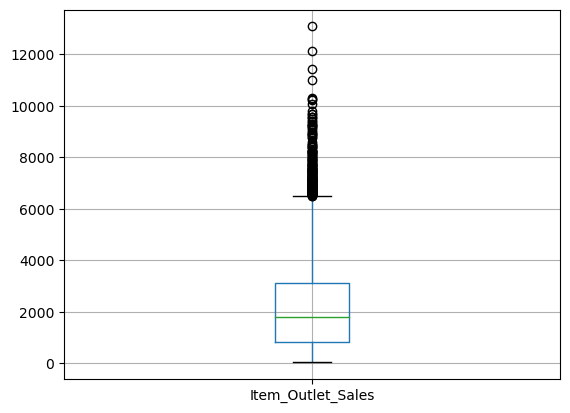

In [68]:
df.boxplot(column= 'Item_Outlet_Sales')

 # Again, there are some extreme values. Clearly, we need data munging and need to find out missing values as well as extreme values.

# Categorical Variable Analysis

In [81]:
df1 = df.select_dtypes(include=['object', 'Float64', 'int64']).columns.tolist()
df1

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

In [141]:
df1 = df['Outlet_Type'].value_counts(ascending=True)
df2 = df.pivot_table(values= 'Item_Outlet_Sales', index=['Outlet_Type'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Outlet_Type:') 
print (df1)



print ('\nProbility of getting Item_Outlet_Sales:')
print (df2)

Frequency Table for Outlet_Type:
Supermarket Type2    1546
Supermarket Type3    1559
Grocery Store        1805
Supermarket Type1    9294
Name: Outlet_Type, dtype: int64

Probility of getting Item_Outlet_Sales:
Empty DataFrame
Columns: []
Index: []


<AxesSubplot:title={'center':'Outlet Type and Sales'}, xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

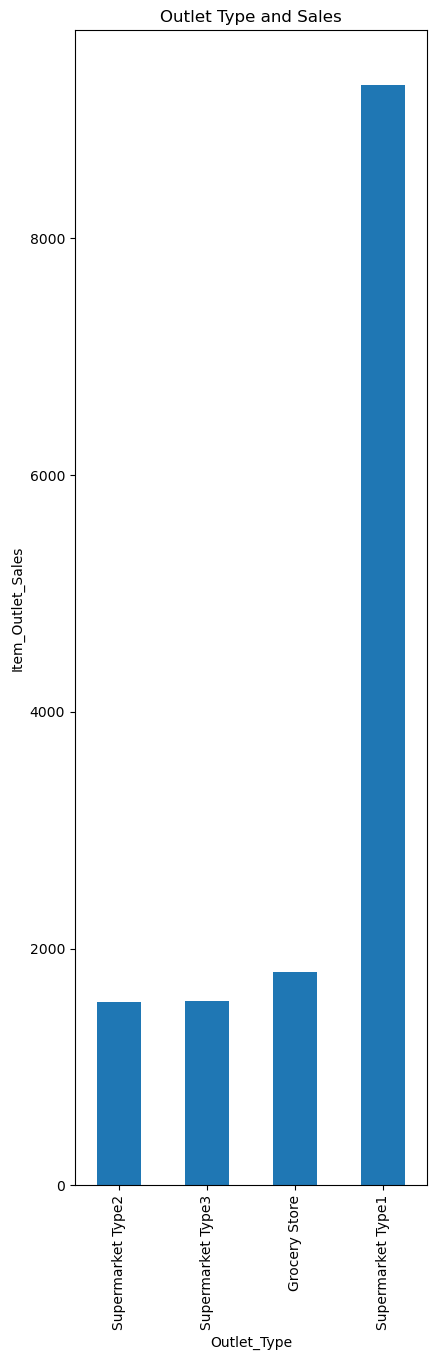

In [106]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,15))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Outlet_Type')
ax1.set_ylabel('Item_Outlet_Sales')
ax1.set_title("Outlet Type and Sales")
df1.plot(kind='bar')

# This shows that Super Market Type1 Store has higher sales among all the outlets

In [118]:
#Alternately, this plot can also be visualized by combining it in a stacked chart::

<AxesSubplot:xlabel='Item_Outlet_Sales'>

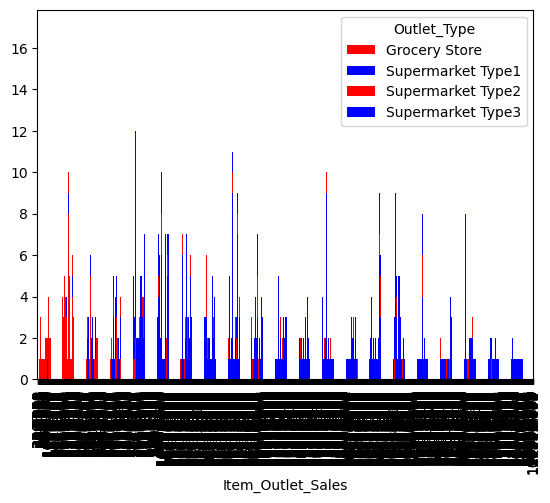

In [123]:
df3 = pd.crosstab(df['Item_Outlet_Sales'], df['Outlet_Type'])
df3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [124]:
#Data Munging in Python : Using Pandas

#While our exploration of the data, we found a few problems in the data set, which needs to be solved before the data is ready for a good model. This exercise is typically referred as “Data Munging”. Here are the problems, we are already aware of:

#There are missing values in some variables. We should estimate those values wisely depending on the amount of missing values and the expected importance of variables.

#While looking at the distributions, we saw that ApplicantIncome and LoanAmount seemed to contain extreme values at either end. Though they might make intuitive sense, but should be treated appropriately.

# Check missing values in the dataset

In [138]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Fill Missing Values in data

In [137]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [142]:
df.nunique()

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
dtype: int64

In [143]:
df['Outlet_Size'] = df['Outlet_Size'].map({"Small":1,"Medium":2,"High":3})

In [144]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

In [145]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

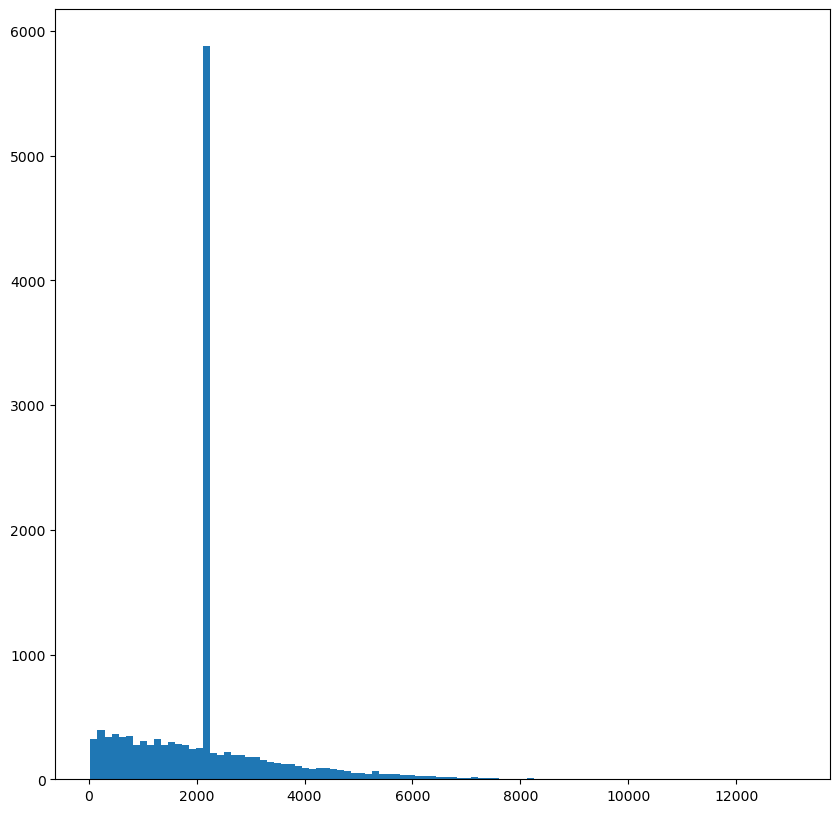

In [146]:
plt.rcParams['figure.figsize'] = (10,10)
plt.hist(df["Item_Outlet_Sales"],bins = 100)
plt.show()

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

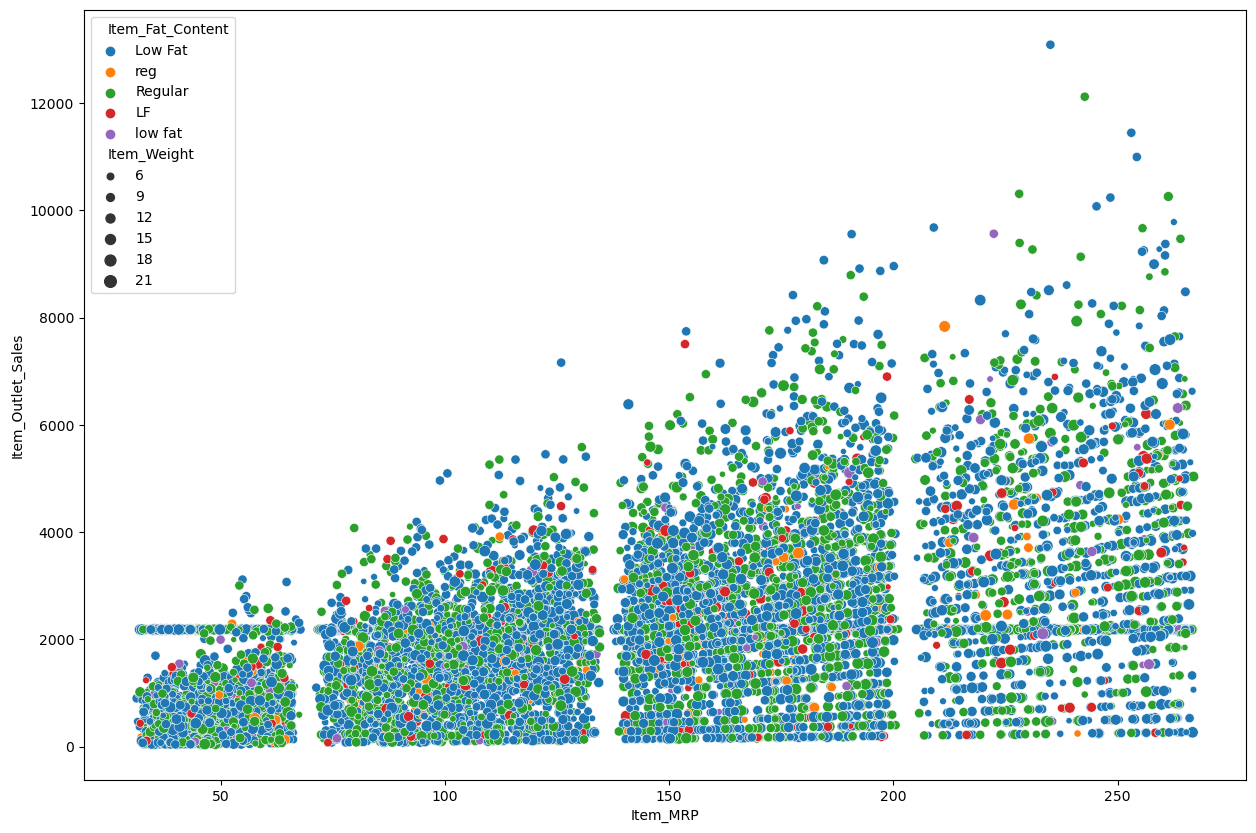

In [147]:
fig,axes=plt.subplots(1,1,figsize=(15,10))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_Weight',data=df)

In [148]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection  import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [149]:
feat = ['Outlet_Size','Outlet_Type','Outlet_Location_Type','Item_Fat_Content',"Item_Type"]
X = pd.get_dummies(df[feat])
df = pd.concat([df,X],axis=1)

In [150]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,2.0,Tier 1,...,0,0,0,0,0,0,0,1,0,0
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,2.0,Tier 2,...,0,0,0,0,0,0,0,0,0,0
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,2.0,Tier 3,...,0,0,0,0,0,1,0,0,0,0
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,2.0,Tier 2,...,0,0,0,0,0,0,0,1,0,0
4,FDY38,12.792854,Regular,0.118599,Dairy,234.2300,OUT027,1985,2.0,Tier 3,...,0,0,0,0,0,0,0,0,0,0


In [151]:
df.drop(labels = ["Outlet_Size",'Outlet_Location_Type',"Outlet_Type",'Item_Fat_Content','Outlet_Identifier','Outlet_Establishment_Year','Item_Identifier',"Item_Type"],axis=1,inplace = True)

In [152]:
df.shape

(14204, 32)

In [153]:
X = df.drop(labels = ["Item_Outlet_Sales"],axis=1)
y = df["Item_Outlet_Sales"]
X.shape,y.shape

((14204, 31), (14204,))

In [154]:
from sklearn import preprocessing

x = X.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled_train = min_max_scaler.fit_transform(x)
df_train = pd.DataFrame(x_scaled_train)

In [155]:
X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size=0.4)

In [156]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [157]:
preds = model.predict(X_test)

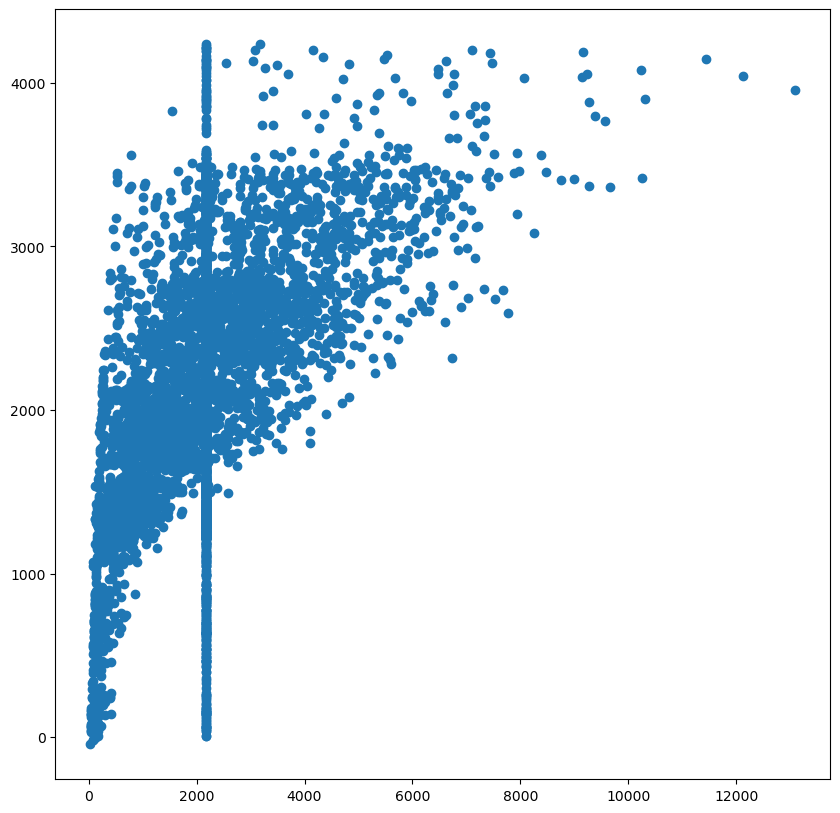

In [158]:
plt.scatter(y_test, preds)
plt.show()

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


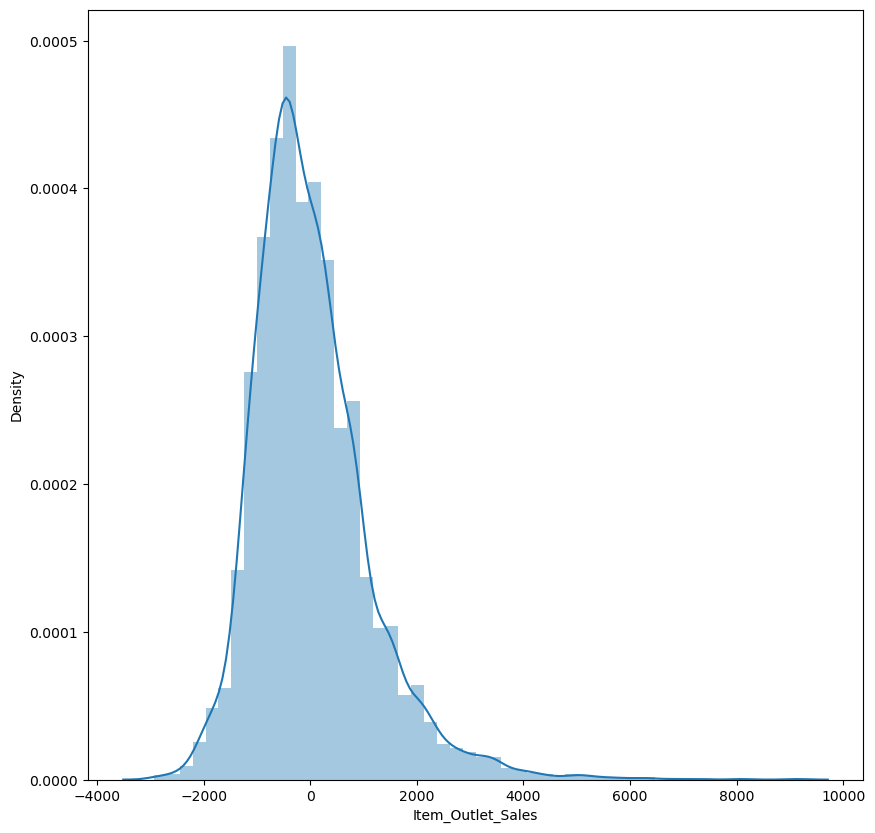

In [159]:
sns.distplot((y_test-preds),bins=50)
plt.show()

In [160]:
print("MAE:", metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

MAE: 806.6016337691049
MSE: 1192654.0024225104
RMSE: 1092.0869939810245
